In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
sns.set(font_scale = 1.5)
sns.set_style("white")

### Constraint function

Currently, all constraints between agents have a binary quadratic form:
$ax^2 + bxy + cy^2$

The coefficients $a$, $b$, and $c$ are set to 1 on initialization but when a change constraint event is received, the coefficients are sampled between $[0, 1]$ for each one and kept until another constraint change event happens.

### Load data

In [3]:
# ours
dg_ccocoa_df = pd.read_csv('../metrics/c-cocoa-d3Lr0.05.csv')
dg_csdpop_df = pd.read_csv('../metrics/c-sdpop-d3Lr0.05.csv')
dg_sdpop_df_d3 = pd.read_csv('../metrics/sdpop-d3Lr0.05.csv')
dg_sdpop_df_d40 = pd.read_csv('../metrics/sdpop-d40Lr0.05.csv')
dg_nodcop_df = pd.read_csv('../metrics/dcop-base-d3Lr0.05.csv')

# baselines
ccocoa_df = pd.read_csv('../metrics/c-cocoa-50agents_d3.sim-Lr0.05.csv')

#### data stats

In [4]:
dg_ccocoa_df.shape, dg_csdpop_df.shape, dg_sdpop_df_d3.shape, dg_sdpop_df_d40.shape, dg_nodcop_df.shape, ccocoa_df.shape

((60, 15), (60, 15), (60, 15), (60, 15), (60, 15), (60, 4))

### chart funcs

In [5]:
def show_event_markers(axis, event_df, metric):
    for i, row in event_df.iterrows():
        if row['type'] == 'add_agent':
            ax.scatter(i, dg_ccocoa_df[metric][i], color='black', marker='o')
            ax.scatter(i, dg_csdpop_df[metric][i], color='black', marker='o')
    #         ax.scatter(i, dg_sdpop_df[metric][i], color='black', marker='o')
            if metric not in ['num_changes']:
                ax.scatter(i, ccocoa_df[metric][i], color='black', marker='o')
        elif row['type'] == 'change_constraint':
            ax.scatter(i, dg_ccocoa_df[metric][i], color='blue', marker='x')
            ax.scatter(i, dg_csdpop_df[metric][i], color='blue', marker='x')
    #         ax.scatter(i, dg_sdpop_df[metric][i], color='blue', marker='x')
            if metric not in ['num_changes']:
                ax.scatter(i, ccocoa_df[metric][i], color='blue', marker='x')
        else:
            ax.scatter(i, dg_ccocoa_df[metric][i], color='red', marker='^')
            ax.scatter(i, dg_csdpop_df[metric][i], color='red', marker='^')
    #         ax.scatter(i, dg_sdpop_df[metric][i], color='red', marker='^')    
            if metric not in ['num_changes']:
                ax.scatter(i, ccocoa_df[metric][i], color='red', marker='^')

### Solution cost

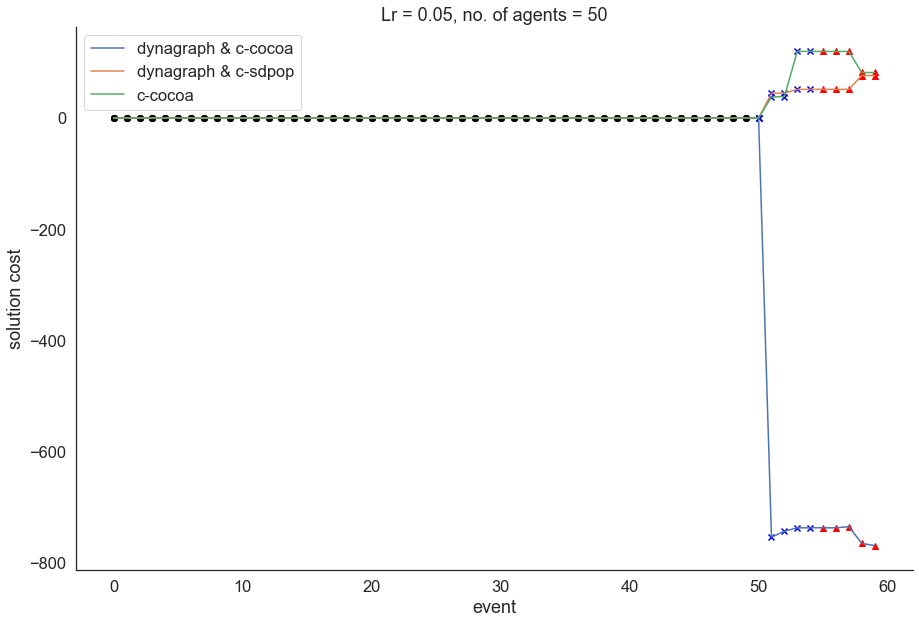

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(dg_ccocoa_df['edge_cost'], label='dynagraph & c-cocoa')
plt.plot(dg_csdpop_df['edge_cost'], label='dynagraph & c-sdpop')
# plt.plot(dg_sdpop_df['edge_cost'], label='dynagraph & sdpop')
plt.plot(ccocoa_df['edge_cost'], label='c-cocoa')
plt.ylabel('solution cost')
plt.xlabel('event')
plt.legend()
plt.title('Lr = 0.05, no. of agents = 50')
show_event_markers(ax, dg_ccocoa_df, metric='edge_cost')
sns.despine(offset=0)
plt.show()

#### SDPOP cost

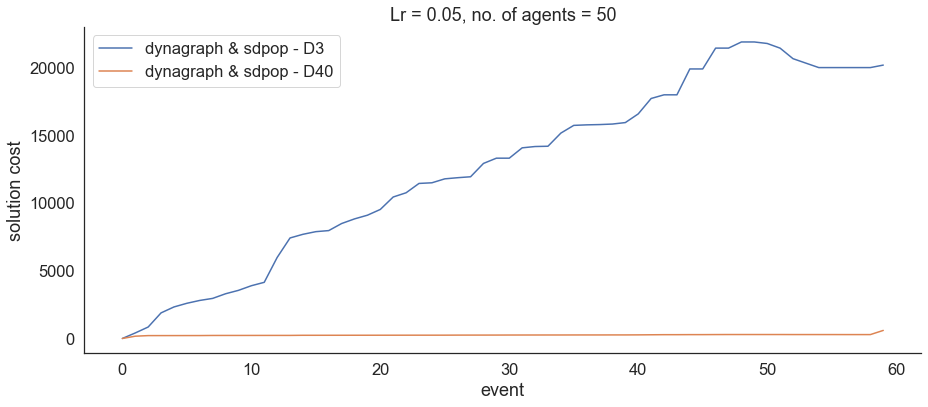

In [7]:
fig, ax = plt.subplots(figsize=(15,6))
plt.plot(dg_sdpop_df_d3['edge_cost'], label='dynagraph & sdpop - D3')
plt.plot(dg_sdpop_df_d40['edge_cost'], label='dynagraph & sdpop - D40')
plt.ylabel('solution cost')
plt.xlabel('event')
plt.legend()
plt.title('Lr = 0.05, no. of agents = 50')
# show_event_markers(ax, dg_ccocoa_df, metric='edge_cost')
sns.despine(offset=0)
plt.show()

### Messages

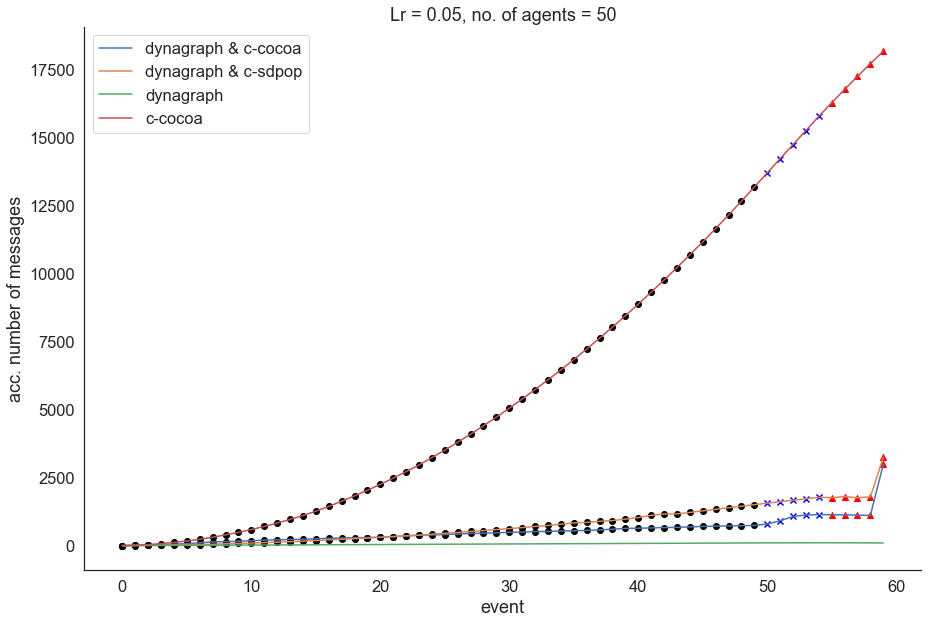

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(dg_ccocoa_df['message_count'], label='dynagraph & c-cocoa')
plt.plot(dg_csdpop_df['message_count'], label='dynagraph & c-sdpop')
# plt.plot(dg_sdpop_df['message_count'], label='dynagraph & sdpop')
plt.plot(dg_nodcop_df['message_count'], label='dynagraph')
plt.plot(ccocoa_df['message_count'], label='c-cocoa')
plt.ylabel('acc. number of messages')
plt.xlabel('event')
plt.legend()
plt.title('Lr = 0.05, no. of agents = 50')
show_event_markers(ax, dg_ccocoa_df, metric='message_count')
sns.despine(offset=0)
plt.show()

### $\Delta$-Changes

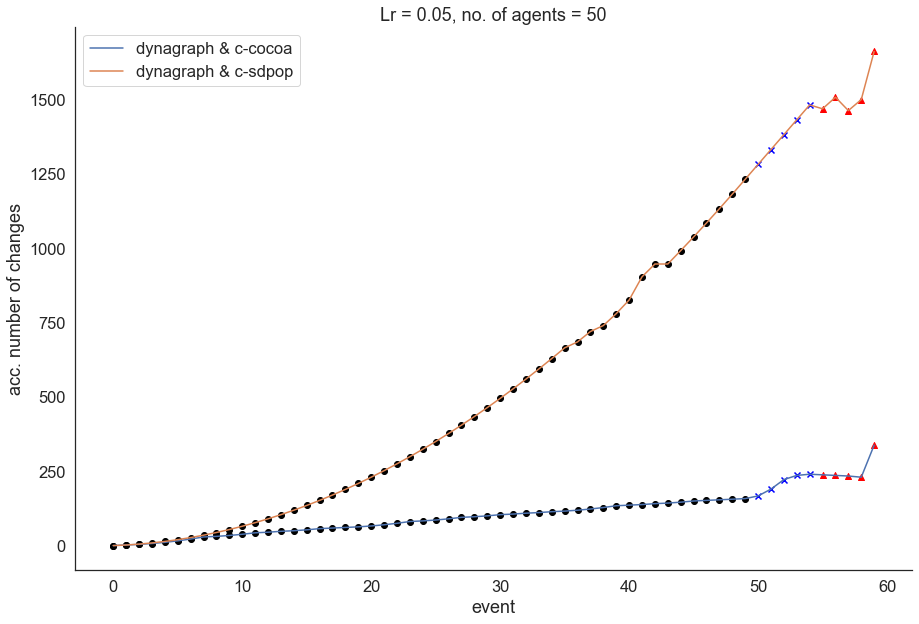

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(dg_ccocoa_df['num_changes'], label='dynagraph & c-cocoa')
plt.plot(dg_csdpop_df['num_changes'], label='dynagraph & c-sdpop')
# plt.plot(dg_sdpop_df['message_count'], label='dynagraph & sdpop')
plt.ylabel('acc. number of changes')
plt.xlabel('event')
plt.legend()
plt.title('Lr = 0.05, no. of agents = 50')
show_event_markers(ax, dg_ccocoa_df, metric='num_changes')
sns.despine(offset=0)
plt.show()